## Q1. From https://github.com/gagolews/teaching-data/tree/master/marek download the two following excerpts from the National Health and Nutrition Examination Survey
  ### (NHANES dataset):
  ### • nhanes_adult_male_bmx_2020.csv,
  ### • nhanes_adult_female_bmx_2020.csv.
  ### They give body measurements of adult males and females.

### META DATA ABOUT THE 2 CSV DATASETS

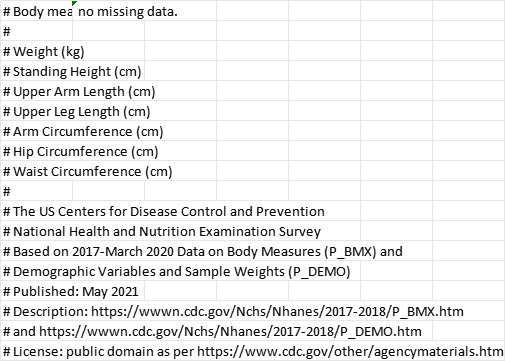

## Q2. Read the two files as numpy matrices named male and female. Each matrix consists of seven columns:
1. weight (kg),
2. standing height (cm),
3. upper arm length (cm),
4. upper leg length (cm),
5. arm circumference (cm),
6. hip circumference (cm),
7. waist circumference (cm).



### IMPORTING REQUIRED LIBRARIES

In [1]:
!pip install stats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.6/127.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stats: filename=stats-0.1.2a0-py3-none-any.whl size=24283 sha256=a5ec48bfac0ba151ec48dac823fb63dcdba304ec517027b2a81165895304cf0b
  Stored in directory: /root/.cache/pip/wheels/c9/85/bc/3371b9bce1e4f7b8b638e8c968a4dbd74db171ee180c48f808
Successfully built stats


In [2]:
import stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr


### DEFINING THE DATAPATHS FOR THE 2 CSV FILES

In [3]:
male_file_path    = '/content/nhanes_adult_male_bmx_2020.csv'
female_file_path  = '/content/nhanes_adult_female_bmx_2020.csv'

### READING THE 2 CSV FILES


In [4]:
male_data   =pd.read_csv(male_file_path)
female_data =pd.read_csv(female_file_path)

In [5]:
num_null_values_female=female_data.isna().sum().sum()
num_null_values_male=male_data.isna().sum().sum()
if  num_null_values_female == 0 and num_null_values_male == 0 :
  print(' there are no null values in data')
else  :
    print(f"Number of null values in male_data: {num_null_values_male}")
    print(f"Number of null values in female_data: {num_null_values_female}")


 there are no null values in data


***Findings*** : *there are no null values in data*

### converting the 2 dataframes to numpy matrices named male and female

In [6]:

male    = male_data.to_numpy()
female  = female_data.to_numpy()
# Check the shape and first few rows of the matrices
print("Male data shape:", male.shape)
print("First few rows of male data:\n", male[:5])
print("Female data shape:", female.shape)
print("First few rows of female data:\n", female[:5])

Male data shape: (4081, 7)
First few rows of male data:
 [[ 98.8 182.3  42.   40.1  38.2 108.2 120.4]
 [ 74.3 184.2  41.1  41.   30.2  94.5  86.8]
 [103.7 185.3  47.   44.   32.  107.8 109.6]
 [ 86.  167.8  39.5  38.4  29.  106.4 108.3]
 [ 99.4 181.6  40.4  39.9  36.  120.2 107. ]]
Female data shape: (4221, 7)
First few rows of female data:
 [[ 97.1 160.2  34.7  40.8  35.8 126.1 117.9]
 [ 91.1 152.7  33.5  33.   38.5 125.5 103.1]
 [ 73.  161.2  37.4  38.   31.8 106.2  92. ]
 [ 61.7 157.4  38.   34.7  29.  101.   90.5]
 [ 55.4 154.6  34.6  34.   28.3  92.5  73.2]]


 **summary** : *We have converted the DataFrames into numpy matrices named male and female, each consisting of seven columns representing different body measurements.*


*  *Male numpy matrix  has 4081 rows and  7 columns*
*  *female numpy matrix  has 4221 rows and  7 columns*




## Q3. On a single plot (use matplotlib.pytplot.subplot)
### draw two histograms: for female weights (top subfigure) , and for male weights (bottom subfigure)
###  Call matplotlib.pyplot.xlim to make the xaxis limits identical for both subfigures (work out the appropriate limits yourself).

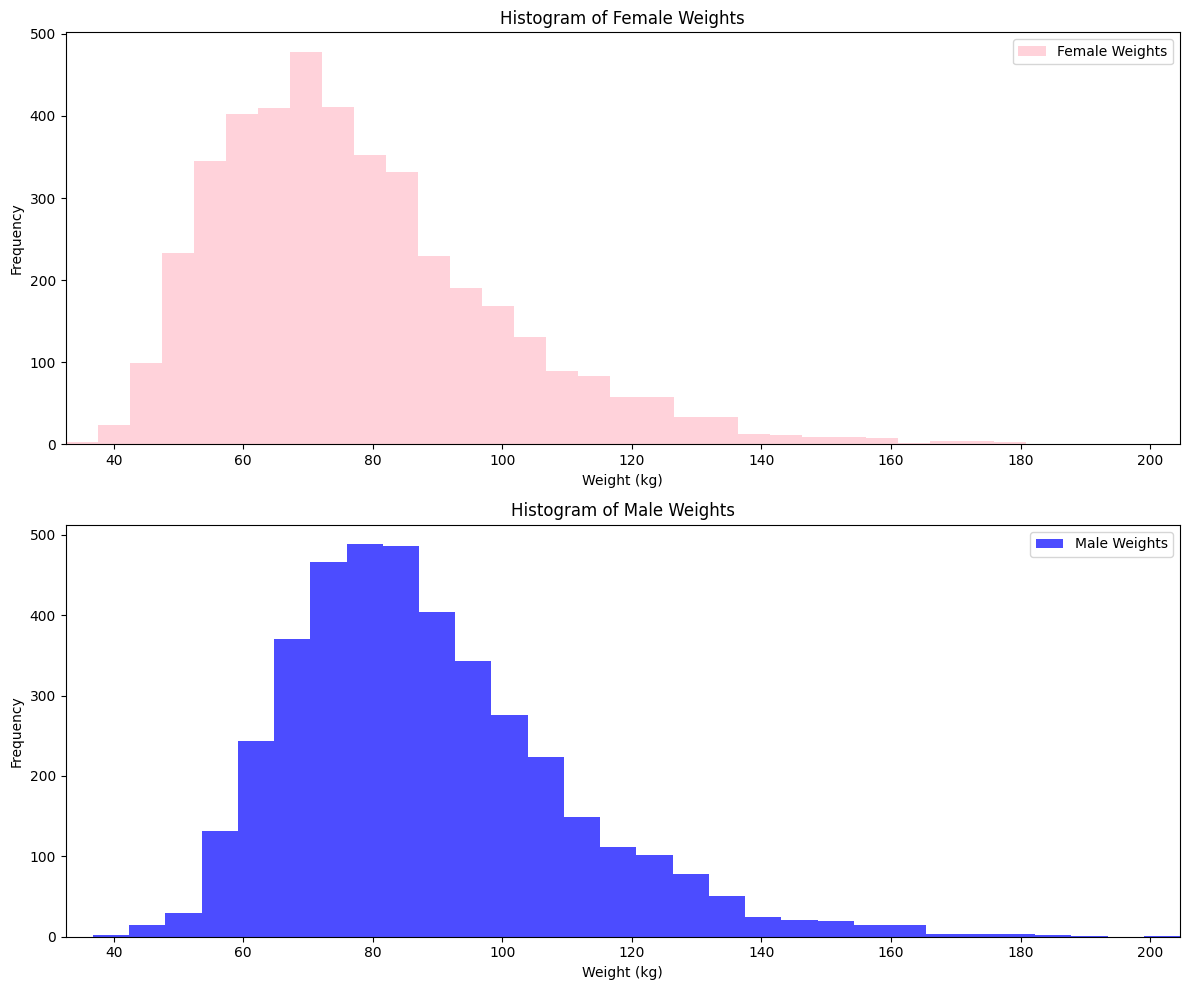

In [8]:
import matplotlib.pyplot as plt

# Extracting the weights
male_weights = male[:, 0]
female_weights = female[:, 0]

# Determine the x-axis limits
x_min = min(male_weights.min(), female_weights.min())
x_max = max(male_weights.max(), female_weights.max())

# Create subplots
plt.figure(figsize=(12, 10))

# Top subfigure for female weights
plt.subplot(2, 1, 1)
plt.hist(female_weights, bins=30, color='pink', alpha=0.7, label='Female Weights')
plt.title('Histogram of Female Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.xlim(x_min, x_max)
plt.legend()

# Bottom subfigure for male weights
plt.subplot(2, 1, 2)
plt.hist(male_weights, bins=30, color='blue', alpha=0.7, label='Male Weights')
plt.title('Histogram of Male Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.xlim(x_min, x_max)
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()


**Summary**:


- Both histograms have the same x-axis limits, ranging from 40 to 200 kg, allowing for a direct comparison of weight distributions between the genders.
- Female weights tend to be more concentrated in the lower range (50-80 kg), while male weights are more spread out and centered around a higher range (60-100 kg).
- The right-skewness in the female weight distribution indicates that there are more outliers or extreme values on the higher end compared to males.
- The male weight distribution is more symmetric, indicating a more even spread of weights around the mean.



## Q4. Call matplotlib.pyplot.boxplot to draw a box-and-whisker plot, with two boxes side by side, giving the male and female weights so that they can be compared to each other.
Note that the boxplot function can be fed with a list of two vectors like [female_weights,
male_weights]. In your own words, discuss the results.

Metric                                        Value
---------------------------------------- ----------
Female weights Q1 value:                 61.6
Male weights Q1 value:                   73.3
Female weights Q2 value (median):        73.6
Male weights Q2 value (median):          85.0
Female weights Q3 value:                 88.7
Male weights Q3 value:                   99.8
IQR Female weights:                      27.1
IQR Male weights:                        26.5
Female weights upper bound value:        129.35
Male weights upper bound value:          139.55
Female weights lower bound value:        20.95
Male weights lower bound value:          33.55
Number of outliers in female weights:    107
Number of outliers in male weights:      102


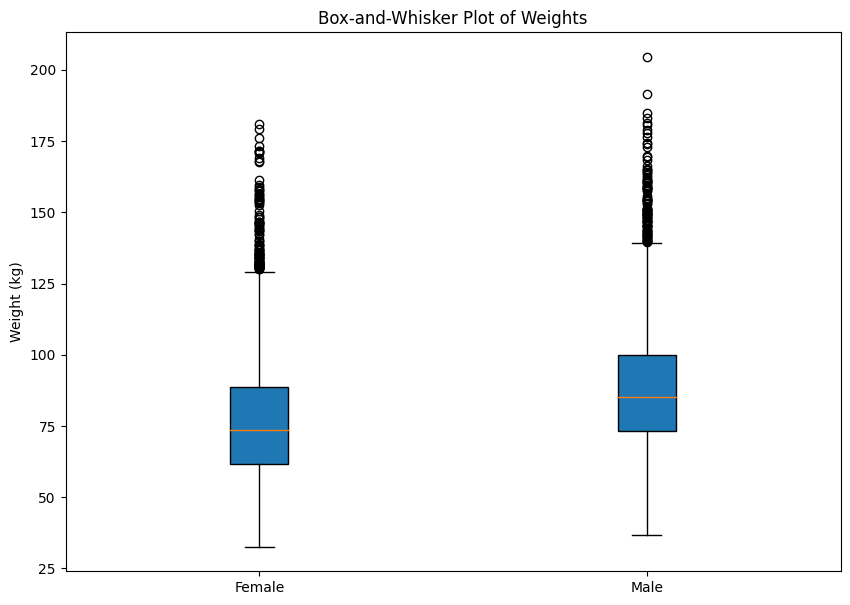

In [9]:


# male_weights and female_weights are already defined as numpy arrays

# Calculate Q1 (25th percentile) ,Q2 (median value) and Q3 (75th percentile) for both datasets
Q1_male = np.percentile(male_weights, 25)
Q2_male = np.percentile(male_weights, 50)
Q3_male = np.percentile(male_weights, 75)
Q1_female = np.percentile(female_weights, 25)
Q2_female = np.percentile(female_weights, 50)
Q3_female = np.percentile(female_weights, 75)

# Calculate IQR for both datasets
IQR_male = Q3_male - Q1_male
IQR_female = Q3_female - Q1_female

# Calculate the lower and upper bounds for detecting outliers
lower_bound_male = Q1_male - 1.5 * IQR_male
upper_bound_male = Q3_male + 1.5 * IQR_male
lower_bound_female = Q1_female - 1.5 * IQR_female
upper_bound_female = Q3_female + 1.5 * IQR_female

# Detect outliers
outliers_male = male_weights[(male_weights < lower_bound_male) | (male_weights > upper_bound_male)]
outliers_female = female_weights[(female_weights < lower_bound_female) | (female_weights > upper_bound_female)]

# Count the number of outliers
num_outliers_male = len(outliers_male)
num_outliers_female = len(outliers_female)

# Bold formatting
bold_start = "\033[1m"
bold_end = "\033[0m"
# Print the results with bold formatting and aligned output
print("{:<40} {:>10}".format('Metric', 'Value'))
print("{:<40} {:>10}".format('-' * 40, '-' * 10))

print("{:<40} {:>10}".format("Female weights Q1 value:", bold_start + str(Q1_female) + bold_end))
print("{:<40} {:>10}".format("Male weights Q1 value:", bold_start + str(Q1_male) + bold_end))
print("{:<40} {:>10}".format("Female weights Q2 value (median):", bold_start + str(np.median(female_weights)) + bold_end))
print("{:<40} {:>10}".format("Male weights Q2 value (median):", bold_start + str(np.median(male_weights)) + bold_end))
print("{:<40} {:>10}".format("Female weights Q3 value:", bold_start + str(Q3_female) + bold_end))
print("{:<40} {:>10}".format("Male weights Q3 value:", bold_start + str(Q3_male) + bold_end))
print("{:<40} {:>10}".format("IQR Female weights:", bold_start + str(IQR_female) + bold_end))
print("{:<40} {:>10}".format("IQR Male weights:", bold_start + str(IQR_male) + bold_end))
print("{:<40} {:>10}".format("Female weights upper bound value:", bold_start + str(round(upper_bound_female,2)) + bold_end))
print("{:<40} {:>10}".format("Male weights upper bound value:", bold_start + str(upper_bound_male) + bold_end))
print("{:<40} {:>10}".format("Female weights lower bound value:", bold_start + str(round(lower_bound_female,2)) + bold_end))
print("{:<40} {:>10}".format("Male weights lower bound value:", bold_start + str(lower_bound_male) + bold_end))
print("{:<40} {:>10}".format("Number of outliers in female weights:", bold_start + str(num_outliers_female) + bold_end))
print("{:<40} {:>10}".format("Number of outliers in male weights:", bold_start + str(num_outliers_male) + bold_end))

# Create box-and-whisker plot
plt.figure(figsize=(10, 7))
plt.boxplot([female_weights, male_weights], labels=['Female', 'Male'], patch_artist=True)
plt.title('Box-and-Whisker Plot of Weights')
plt.ylabel('Weight (kg)')
plt.show()
import pandas as pd
import numpy as np



**Summary**:

**Central Tendency**: *The median weight is higher for males (85.0 kg) compared to females (73.6 kg), indicating that males tend to weigh more than females on average.*

**Variability**: *The IQR for both genders is quite similar, with females having a slightly larger IQR (27.1 kg) compared to males (26.5 kg). This suggests that the middle 50% of the weights are similarly spread out for both genders.*


**Outliers**: *Both male and female weight distributions exhibit a significant number of outliers. These outliers are more frequent in the upper range, indicating that a notable number of participants have weights significantly higher than the typical range.*





## Q5. Compute the basic numerical aggregates of the male and female weights (measures of location, dispersion, and shape). In your own words, describe and compare the two distributions (e.g., are they left skewed, which one has more dispersion, and so forth).

In [10]:
import numpy as np
from scipy.stats import skew, kurtosis



# Compute basic numerical aggregates for male weights
mean_male = np.mean(male_weights)
median_male = np.median(male_weights)
variance_male = np.var(male_weights)
std_dev_male = np.std(male_weights)
range_male = np.ptp(male_weights)  # ptp: peak to peak, equivalent to max - min
iqr_male = np.percentile(male_weights, 75) - np.percentile(male_weights, 25)
skewness_male = skew(male_weights)
kurtosis_male = kurtosis(male_weights)

# Compute basic numerical aggregates for female weights
mean_female = np.mean(female_weights)
median_female = np.median(female_weights)
variance_female = np.var(female_weights)
std_dev_female = np.std(female_weights)
range_female = np.ptp(female_weights)
iqr_female = np.percentile(female_weights, 75) - np.percentile(female_weights, 25)
skewness_female = skew(female_weights)
kurtosis_female = kurtosis(female_weights)

# Print the results with formatting
print(f"{'Metric':<30} {'Male Weights':>15} {'Female Weights':>15}")
print(f"{'-'*60}")
print(f"{'Mean':<30} {mean_male:>15.2f} {mean_female:>15.2f}")
print(f"{'Median':<30} {median_male:>15.2f} {median_female:>15.2f}")
print(f"{'Variance':<30} {variance_male:>15.2f} {variance_female:>15.2f}")
print(f"{'Standard Deviation':<30} {std_dev_male:>15.2f} {std_dev_female:>15.2f}")
print(f"{'Range':<30} {range_male:>15.2f} {range_female:>15.2f}")
print(f"{'IQR':<30} {iqr_male:>15.2f} {iqr_female:>15.2f}")
print(f"{'Skewness':<30} {skewness_male:>15.2f} {skewness_female:>15.2f}")
print(f"{'Kurtosis':<30} {kurtosis_male:>15.2f} {kurtosis_female:>15.2f}")


Metric                            Male Weights  Female Weights
------------------------------------------------------------
Mean                                     88.36           77.40
Median                                   85.00           73.60
Variance                                458.77          464.08
Standard Deviation                       21.42           21.54
Range                                   167.80          148.30
IQR                                      26.50           27.10
Skewness                                  0.98            1.03
Kurtosis                                  1.47            1.40


***FINDINGS AND SUMMARY***

 **Central Tendency :**



*   ***Mean:*** The mean weight is higher for males (88.36 kg) compared to females(77.40 kg).

*   ***Median:*** Similarly, the median weight is higher for males (85.00 kg) than for females (73.60 kg).





 **Dispersion :**


* ***Variance and Standard Deviation:*** Both metrics indicate that the dispersion (spread) of weights is similar between males and females, with males having a slightly lower variance (458.77) and standard deviation (21.42 kg) compared to females (variance of 464.08 and standard deviation of 21.54 kg).

*  ***Range:*** The range, which is the difference between the maximum and minimum weights, is greater for males (167.80 kg) than for females (148.30 kg), indicating a broader spread in the weights of males.


*  ***Interquartile Range (IQR):*** The IQR, which measures the middle 50% of the data, is slightly lower for males (26.50 kg) compared to females (27.10 kg), suggesting a similar spread within the central portion of the data for both genders.







**Shape :**


*  ***Skewness:***  Both distributions are right-skewed (positively skewed), with skewness values of 0.98 for males and 1.03 for females. This indicates that both distributions have longer tails on the right side, with females being slightly more skewed.

* ***Kurtosis:***  Both distributions have positive kurtosis values (1.47 for males and 1.40 for females), indicating that they are leptokurtic. This means they have sharper peaks and fatter tails compared to a normal distribution, with males having a slightly higher kurtosis.




 **Summary :**

***Central Tendency:*** Males generally weigh more than females.

***Dispersion:*** The spread of weights is quite similar for both genders, but males have a slightly larger range.

***Shape:*** Both distributions are right-skewed and leptokurtic, with similar skewness and kurtosis values.

***Overall, while both distributions share many similarities in terms of dispersion and shape, the key difference lies in the central tendency, with males generally having higher weights than females.***

## 6. To the female matrix, add the eight column which gives the body mass indices of all the female participants.

In [11]:
female.shape

(4221, 7)

SINCE the body height is in cms ,we are dividing it with 100 to make it in meters, so that we can calculate the bmi.

 ***bmi = weight(kgs) / (height(meters)) **2***

In [7]:
bmi=np.round(female[:,0]/(female[:,1]/100)**2,2)
female_with_bmi=np.column_stack((female,bmi))

In [8]:
female_with_bmi[:7,:] # returns 7 rows and all columns

array([[ 97.1 , 160.2 ,  34.7 ,  40.8 ,  35.8 , 126.1 , 117.9 ,  37.84],
       [ 91.1 , 152.7 ,  33.5 ,  33.  ,  38.5 , 125.5 , 103.1 ,  39.07],
       [ 73.  , 161.2 ,  37.4 ,  38.  ,  31.8 , 106.2 ,  92.  ,  28.09],
       [ 61.7 , 157.4 ,  38.  ,  34.7 ,  29.  , 101.  ,  90.5 ,  24.9 ],
       [ 55.4 , 154.6 ,  34.6 ,  34.  ,  28.3 ,  92.5 ,  73.2 ,  23.18],
       [ 62.  , 144.7 ,  32.5 ,  34.2 ,  29.8 , 106.7 ,  84.8 ,  29.61],
       [ 66.2 , 166.5 ,  37.5 ,  37.6 ,  32.  ,  96.3 ,  95.7 ,  23.88]])

In [9]:
female_with_bmi.shape

(4221, 8)

##7. Create a new matrix zfemale being a version of the female dataset with all its columns standardised (by computing the z-scores of each column).

In [10]:
mean = np.mean(female_with_bmi, axis=0)
std_dev = np.std(female_with_bmi, axis=0)
zfemale = (female_with_bmi - mean) / std_dev

In [16]:
mean

array([ 77.40379057, 160.13679223,  36.0310353 ,  37.15797204,
        32.71032931, 109.17837005,  98.48810708,  30.10338782])

In [17]:
std_dev

array([21.54250829,  7.06202185,  2.34587221,  3.21453346,  5.60896095,
       15.6224431 , 17.39752685,  7.75521911])

In [13]:
female_with_bmi[:5,:]

array([[ 97.1 , 160.2 ,  34.7 ,  40.8 ,  35.8 , 126.1 , 117.9 ,  37.84],
       [ 91.1 , 152.7 ,  33.5 ,  33.  ,  38.5 , 125.5 , 103.1 ,  39.07],
       [ 73.  , 161.2 ,  37.4 ,  38.  ,  31.8 , 106.2 ,  92.  ,  28.09],
       [ 61.7 , 157.4 ,  38.  ,  34.7 ,  29.  , 101.  ,  90.5 ,  24.9 ],
       [ 55.4 , 154.6 ,  34.6 ,  34.  ,  28.3 ,  92.5 ,  73.2 ,  23.18]])

In [12]:
zfemale[:5,:]

array([[ 0.91429508,  0.00895038, -0.56739463,  1.13298804,  0.55084546,
         1.08316157,  1.11578462,  0.99760072],
       [ 0.63577599, -1.05306843, -1.07893145, -1.29349161,  1.03221804,
         1.04475528,  0.265089  ,  1.15620359],
       [-0.2044233 ,  0.15055289,  0.5835632 ,  0.26194406, -0.1622991 ,
        -0.19064688, -0.37293272, -0.25961714],
       [-0.7289676 , -0.38753664,  0.83933161, -0.76464348, -0.66150029,
        -0.52350135, -0.45915188, -0.67095304],
       [-1.02141265, -0.78402366, -0.6100227 , -0.98240447, -0.78630059,
        -1.06759039, -1.45354609, -0.89273916]])

## 8. Draw a scatterplot matrix (pairplot)

for the standardised versions of height, weight, waist circumference, hip circumference, and BMI of the females (based on zfemale).

Compute Pearson’s and Spearman’s correlation coefficients for all pairs of variables.

Interpret the obtained results.

In [35]:
# these are the columns we have in "zfemale" matrix (all values of "female_with_bmi" matrix are standardized using z-scores)  (total 8 columns) .
# weight (kg),
# standing height (cm),
# upper arm length (cm),
# upper leg length (cm),
# arm circumference (cm),
# hip circumference (cm),
# waist circumference (cm),
# bmi.

# returning top 5 rows from the "zfemale" matrix
zfemale[:5,:]

array([[ 0.91429508,  0.00895038, -0.56739463,  1.13298804,  0.55084546,
         1.08316157,  1.11578462,  0.99760072],
       [ 0.63577599, -1.05306843, -1.07893145, -1.29349161,  1.03221804,
         1.04475528,  0.265089  ,  1.15620359],
       [-0.2044233 ,  0.15055289,  0.5835632 ,  0.26194406, -0.1622991 ,
        -0.19064688, -0.37293272, -0.25961714],
       [-0.7289676 , -0.38753664,  0.83933161, -0.76464348, -0.66150029,
        -0.52350135, -0.45915188, -0.67095304],
       [-1.02141265, -0.78402366, -0.6100227 , -0.98240447, -0.78630059,
        -1.06759039, -1.45354609, -0.89273916]])

In [14]:
# lets remove unnecessary columns which doesnot mentioned in the 8th question .
cols_to_remove = [2, 3, 4]

#removing these columns from the zfemale matrix ( upper arm length (cm), upper leg length (cm), arm circumference (cm),)
zfemale_reduced = np.delete(zfemale, cols_to_remove, axis=1)

In [15]:
#returning first 5 rows from the "zfemale_reduced" matrix which is having only 5 columns  after removing  2,3,4columns from "zfemale" matrix
zfemale_reduced[:5,:]

array([[ 0.91429508,  0.00895038,  1.08316157,  1.11578462,  0.99760072],
       [ 0.63577599, -1.05306843,  1.04475528,  0.265089  ,  1.15620359],
       [-0.2044233 ,  0.15055289, -0.19064688, -0.37293272, -0.25961714],
       [-0.7289676 , -0.38753664, -0.52350135, -0.45915188, -0.67095304],
       [-1.02141265, -0.78402366, -1.06759039, -1.45354609, -0.89273916]])

In [16]:
# converting the "zfemale_reduced" matrix into  "zfemale_reduced_df" dataframe to plot the pairpplot .
zfemale_reduced_df = pd.DataFrame(zfemale_reduced, columns=["weight (kg)", "standing height (cm)", "hip circumference (cm)", "waist circumference (cm)", "BMI"])

#returning  top 5 entries from the "zfemale_reduced_df" dataframe
zfemale_reduced_df.head()

,weight (kg),standing height (cm),hip circumference (cm),waist circumference (cm),BMI
0,0.914295,0.008950,1.083162,1.115785,0.997601
1,0.635776,-1.053068,1.044755,0.265089,1.156204
2,-0.204423,0.150553,-0.190647,-0.372933,-0.259617
3,-0.728968,-0.387537,-0.523501,-0.459152,-0.670953
4,-1.021413,-0.784024,-1.067590,-1.453546,-0.892739


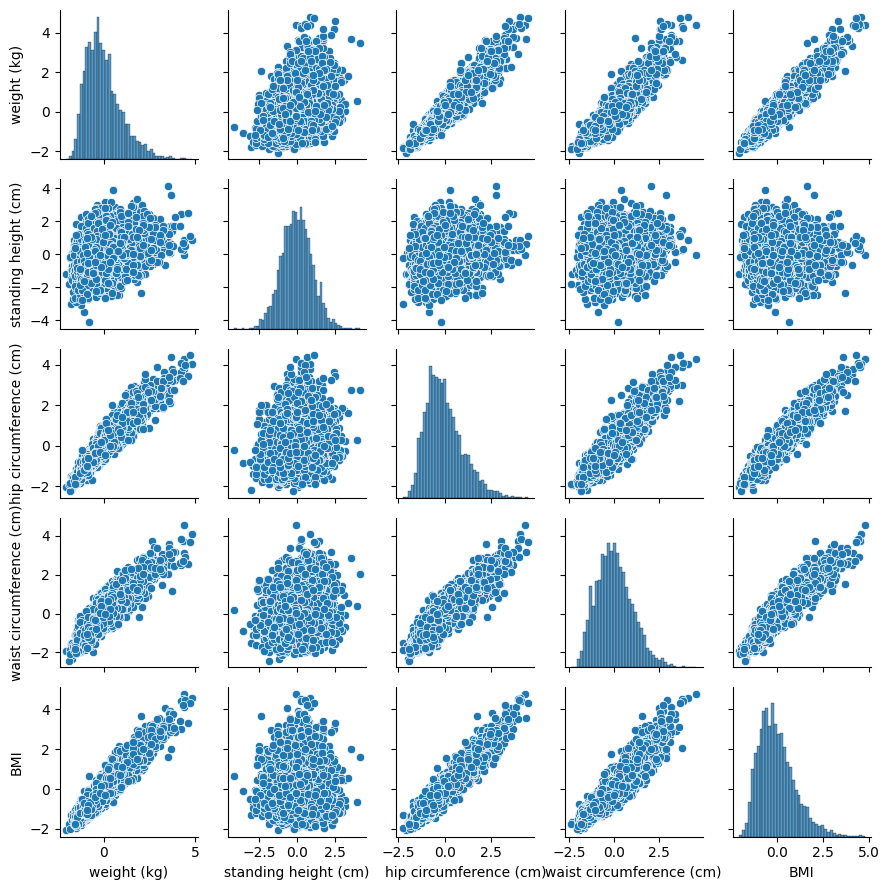

In [54]:
# creating pairplot of "zfemale_reduced_df" dataframe using seaborn library
pairplot=sns.pairplot(zfemale_reduced_df,height=1.8)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Computing Pearson’s and Spearman’s correlation coefficients
pearson_corr = zfemale_reduced_df.corr(method='pearson')
spearman_corr = zfemale_reduced_df.corr(method='spearman')

In [38]:
# Pearson’s correlation coefficients for all pairs of variables
pearson_corr

,weight (kg),standing height (cm),hip circumference (cm),waist circumference (cm),BMI
weight (kg),1.000000,0.345496,0.946553,0.904550,0.945900
standing height (cm),0.345496,1.000000,0.202895,0.126547,0.033078
hip circumference (cm),0.946553,0.202895,1.000000,0.897407,0.944200
waist circumference (cm),0.904550,0.126547,0.897407,1.000000,0.921199
BMI,0.945900,0.033078,0.944200,0.921199,1.000000


In [39]:
# Spearman’s correlation coefficients for all pairs of variables
spearman_corr

,weight (kg),standing height (cm),hip circumference (cm),waist circumference (cm),BMI
weight (kg),1.000000,0.338860,0.946634,0.900169,0.937994
standing height (cm),0.338860,1.000000,0.205405,0.108587,0.019884
hip circumference (cm),0.946634,0.205405,1.000000,0.888037,0.934198
waist circumference (cm),0.900169,0.108587,0.888037,1.000000,0.923119
BMI,0.937994,0.019884,0.934198,0.923119,1.000000


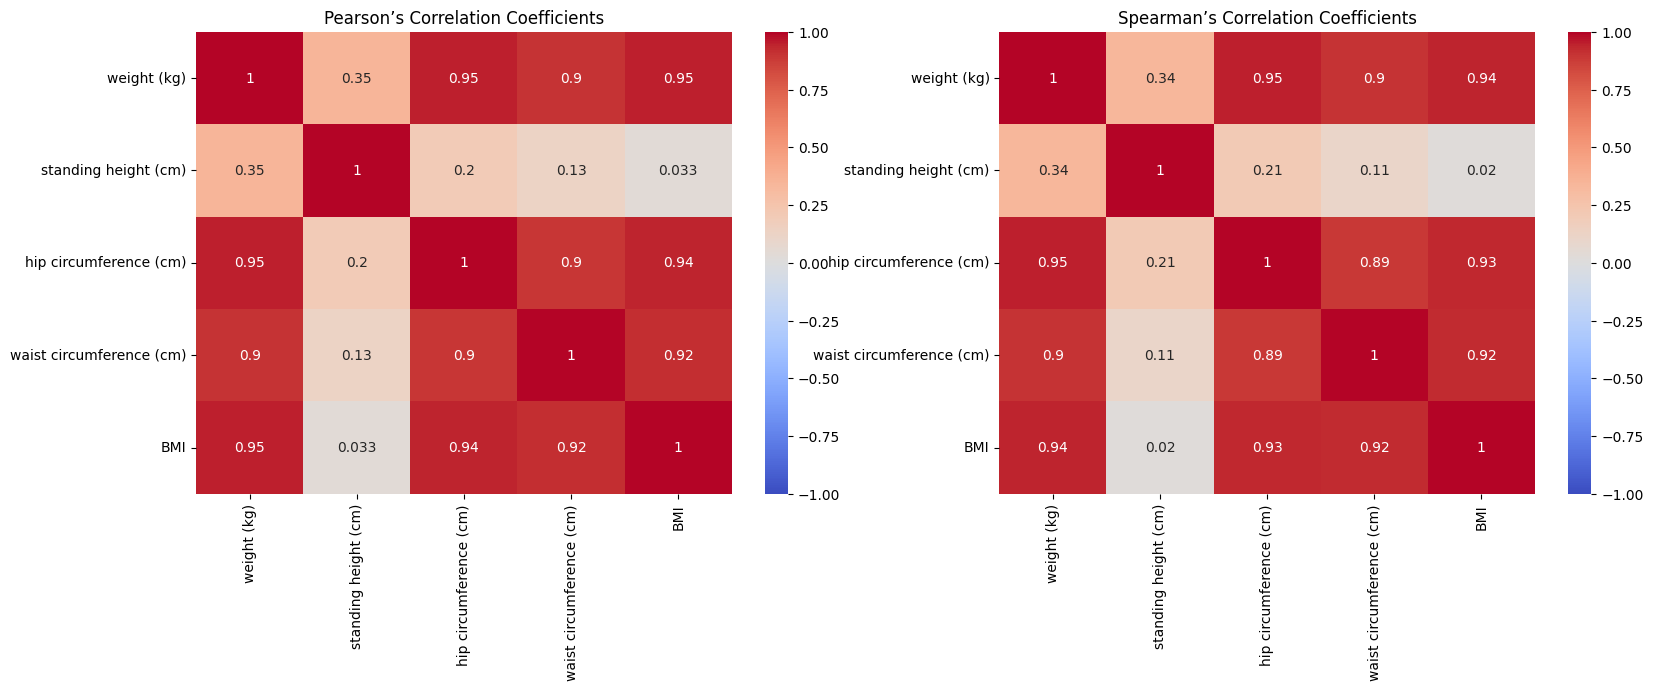

In [57]:
# Displaying correlation matrices visually
plt.figure(figsize=(19, 6))
plt.subplot(1, 2, 1)
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Pearson’s Correlation Coefficients")

plt.subplot(1, 2, 2)
sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Spearman’s Correlation Coefficients")

plt.show()


**Interpretation of Results**

There is a strong positive linear relationship between weight and BMI.

There is a clear positive linear relationship between weight and hip circumference.

Similar to hip circumference, there is a positive linear relationship between weight and waist circumference.

There is a strong positive linear relationship between hip and waist circumference. This indicates that individuals with larger hips tend to also have larger waists.

There is no clear linear relationship between height and BMI, indicating that BMI is more directly related to weight than to height alone.

There appears to be a slight positive correlation between Height and Hip/Waist Circumference, but it is not as strong as the correlation between weight and the circumferences.

Weight will likely have a high positive Pearson and Spearman correlation with BMI, hip circumference, and waist circumference.

Height might have lower correlation values with BMI but moderate correlations with hip and waist circumference.

## 9. Computing the

waist circumference to height ratio and

the waist circumference to hip circumference ratio of

the male and female participants by adding two more columns to
the males and females matrices.

In [59]:
# 'male' and 'female' matrices are already defined
male[:5,:] #7 columns in male matrix

array([[ 98.8, 182.3,  42. ,  40.1,  38.2, 108.2, 120.4],
       [ 74.3, 184.2,  41.1,  41. ,  30.2,  94.5,  86.8],
       [103.7, 185.3,  47. ,  44. ,  32. , 107.8, 109.6],
       [ 86. , 167.8,  39.5,  38.4,  29. , 106.4, 108.3],
       [ 99.4, 181.6,  40.4,  39.9,  36. , 120.2, 107. ]])

In [60]:
female[:5,:] #7 columns in female matrix

array([[ 97.1, 160.2,  34.7,  40.8,  35.8, 126.1, 117.9],
       [ 91.1, 152.7,  33.5,  33. ,  38.5, 125.5, 103.1],
       [ 73. , 161.2,  37.4,  38. ,  31.8, 106.2,  92. ],
       [ 61.7, 157.4,  38. ,  34.7,  29. , 101. ,  90.5],
       [ 55.4, 154.6,  34.6,  34. ,  28.3,  92.5,  73.2]])

In [17]:
# Compute waist to height ratio
waist_to_height_male = np.round(male[:, 6] / male[:, 1],2)
waist_to_height_female = np.round(female[:, 6] / female[:, 1],2)

# Compute waist to hip ratio
waist_to_hip_male = np.round(male[:, 6] / male[:, 5],2)
waist_to_hip_female = np.round(female[:, 6] / female[:, 5],2)

# Add the new columns to the matrices
male_with_ratios = np.column_stack((male, waist_to_height_male, waist_to_hip_male))
female_with_ratios = np.column_stack((female, waist_to_height_female, waist_to_hip_female))

In [18]:
# Display the first few rows of the updated matrices to verify the new columns are added correctly
male_with_ratios[:5,:] #total 9 columns (2 being added )

array([[ 98.8 , 182.3 ,  42.  ,  40.1 ,  38.2 , 108.2 , 120.4 ,   0.66,
          1.11],
       [ 74.3 , 184.2 ,  41.1 ,  41.  ,  30.2 ,  94.5 ,  86.8 ,   0.47,
          0.92],
       [103.7 , 185.3 ,  47.  ,  44.  ,  32.  , 107.8 , 109.6 ,   0.59,
          1.02],
       [ 86.  , 167.8 ,  39.5 ,  38.4 ,  29.  , 106.4 , 108.3 ,   0.65,
          1.02],
       [ 99.4 , 181.6 ,  40.4 ,  39.9 ,  36.  , 120.2 , 107.  ,   0.59,
          0.89]])

In [19]:
female_with_ratios[:5,:] #total 9 columns (2 being added )

array([[ 97.1 , 160.2 ,  34.7 ,  40.8 ,  35.8 , 126.1 , 117.9 ,   0.74,
          0.93],
       [ 91.1 , 152.7 ,  33.5 ,  33.  ,  38.5 , 125.5 , 103.1 ,   0.68,
          0.82],
       [ 73.  , 161.2 ,  37.4 ,  38.  ,  31.8 , 106.2 ,  92.  ,   0.57,
          0.87],
       [ 61.7 , 157.4 ,  38.  ,  34.7 ,  29.  , 101.  ,  90.5 ,   0.57,
          0.9 ],
       [ 55.4 , 154.6 ,  34.6 ,  34.  ,  28.3 ,  92.5 ,  73.2 ,   0.47,
          0.79]])

## 10. Draw a box-and-whisker plot with four boxes side by side, comparing the distribution
of the waistto-height ratio and the waist-to-hip ratio of both male and female participants.
Explain what you see.

In [33]:
# we already computed the waist_to_height_male, waist_to_height_female, waist_to_hip_male, waist_to_hip_female in before query.
#now lets see the arrays and their length
print('waist_to_height_male array:',waist_to_height_male)
print('length of waist_to_height_male array :',len(waist_to_height_male))
print('----------------------------------------------------------------------------')
print('waist_to_height_female array:',waist_to_height_female)
print('length of waist_to_height_female array :',len(waist_to_height_female))
print('----------------------------------------------------------------------------')
print('waist_to_hip_male array:',waist_to_hip_male)
print('length of waist_to_hip_male array :',len(waist_to_hip_male))
print('----------------------------------------------------------------------------')
print('waist_to_hip_female array:',waist_to_hip_female)
print('length of waist_to_hip_female array :',len(waist_to_hip_female))

waist_to_height_male array: [0.66 0.47 0.59 ... 0.68 0.55 0.52]
length of waist_to_height_male array : 4081
----------------------------------------------------------------------------
waist_to_height_female array: [0.74 0.68 0.57 ... 0.62 0.58 0.74]
length of waist_to_height_female array : 4221
----------------------------------------------------------------------------
waist_to_hip_male array: [1.11 0.92 1.02 ... 0.97 0.97 0.96]
length of waist_to_hip_male array : 4081
----------------------------------------------------------------------------
waist_to_hip_female array: [0.93 0.82 0.87 ... 0.95 0.96 0.91]
length of waist_to_hip_female array : 4221


In [45]:
#creating a "ratio" array by concatinating all the ratios

ratio = np.concatenate([waist_to_height_male, waist_to_height_female, waist_to_hip_male, waist_to_hip_female])
print('length of ratio array :',len(ratio))


#Creating  an array  "ratio_type" that contains labels for each ratio type, repeated for the length of the respective ratio data.
#This array will help in labeling the data points when plotting or analyzing them.

ratio_type = ['Waist-to-Height'] * len(waist_to_height_male) + ['Waist-to-Height'] * len(waist_to_height_female) + ['Waist-to-Hip'] * len(waist_to_hip_male) + ['Waist-to-Hip'] * len(waist_to_hip_female)
print('length of ratio_type array :',len(ratio_type))  #object datatype


#Create an array called "Gender" that contains labels for each Gender type(male and female),
#repeated for the length of the respective Gender data (male -4081  +female-4221 ).

gender = ['Male'] * len(waist_to_height_male) + ['Female'] * len(waist_to_height_female) +['Male'] * len(waist_to_hip_male) + ['Female'] * len(waist_to_hip_female)
print('length of gender array :',len(gender))

# creating a dictionary with the above arrays (ratio,ratio_type,Gender)
ratio_data = { 'Ratio': ratio, 'Ratio_type': ratio_type, 'Gender': gender }
# Combine data into a single DataFrame for seaborn to plot the boxplots
ratio_df = pd.DataFrame(ratio_data)
print('shape of ratio_df dataframe :',ratio_df.shape)
ratio_df

length of ratio array : 16604
length of ratio_type array : 16604
length of gender array : 16604
shape of ratio_df dataframe : (16604, 3)


,Ratio,Ratio_type,Gender
0,0.66,Waist-to-Height,Male
1,0.47,Waist-to-Height,Male
2,0.59,Waist-to-Height,Male
3,0.65,Waist-to-Height,Male
4,0.59,Waist-to-Height,Male
...,...,...,...
16599,0.89,Waist-to-Hip,Female
16600,0.93,Waist-to-Hip,Female
16601,0.95,Waist-to-Hip,Female
16602,0.96,Waist-to-Hip,Female


In [49]:
print(ratio_df.Ratio_type.value_counts())
print('------------------------------------')
print(ratio_df.Gender.value_counts())

Ratio_type
Waist-to-Height    8302
Waist-to-Hip       8302
Name: count, dtype: int64
------------------------------------
Gender
Female    8442
Male      8162
Name: count, dtype: int64


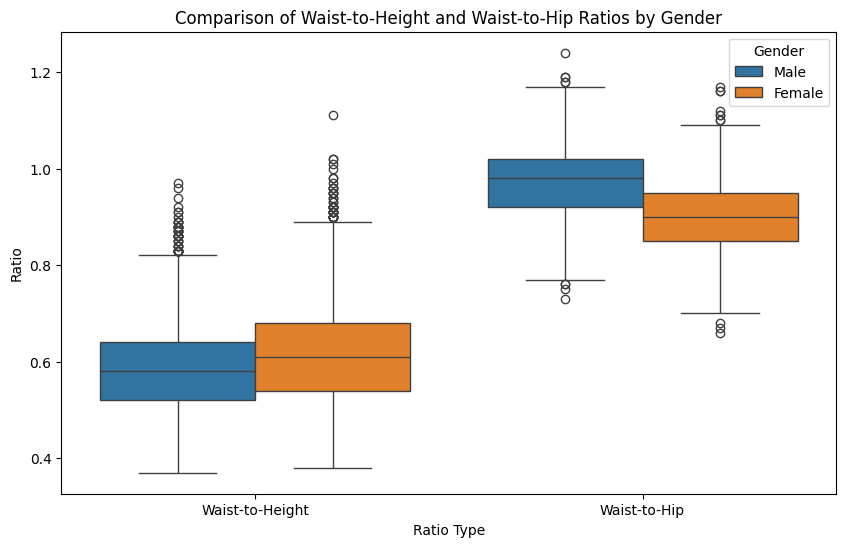

In [51]:
# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ratio_type', y='Ratio', hue='Gender', data=ratio_df)
plt.title('Comparison of Waist-to-Height and Waist-to-Hip Ratios by Gender')
plt.xlabel('Ratio Type')
plt.ylabel('Ratio')
plt.show()


**Waist-to-Height Ratio**

The median waist-to-height ratio for males is slightly below 0.6.



The median waist-to-height ratio for females is slightly above 0.6.



There are outliers above the upper whisker for both male and female's Waist-to-Height Ratio

Both males and females have similar distributions, but females have a slightly higher median indicating a slightly higher  waist-to-height ratio.

**Waist-to-Hip Ratio**

The median waist-to-hip ratio for males is close to 0.9.

The median waist-to-hip ratio for females is around 0.8.


Males have a higher median waist-to-hip ratio compared to females.

There are a few outliers above the upper whisker and some below the lower whisker for both male and female's waist-to-hip ratio.

## 11. In your own words, list some advantages and disadvantages of BMI, waist-to-heightratio, and waist-to-hip ratio.

**Body Mass Index (BMI)**

**Advantages:**



*  ***Simplicity:*** BMI is easy to calculate using only height and weight.
*   ***Widely Used:*** It is a well-known measure, making it easy to communicate and compare with established health guidelines.
  
*  ***General Indicator:*** Provides a general indicator of body fat and is useful for identifying obesity and underweight status.





Disadvantages:
Does Not Differentiate Between Fat and Muscle: BMI does not distinguish between lean body mass (muscle) and fat mass. This can lead to misleading classifications, especially for athletes.

Ignores Fat Distribution: It does not account for the distribution of fat throughout the body, which can be an important indicator of health risks.
Age and Gender Variations: It may not be as accurate for older adults or different genders, as body composition can vary significantly.

Waist-to-Height Ratio

Advantages:

Better Indicator of Abdominal Fat: More closely associated with abdominal fat, which is a significant risk factor for cardiovascular diseases and metabolic disorders.

Predictive Power: Some studies suggest it has a better predictive value for certain health risks compared to BMI.

Simple Calculation: Requires only waist circumference and height, which are easy to measure.

Disadvantages:

Measurement Variability: Accurate measurement of waist circumference can be tricky and may vary based on how and where it is measured.

Lack of Standardized Cutoffs: There is less consensus on the optimal cutoffs for health risks compared to BMI.

May Still Overlook Muscle Mass: Like BMI, it does not account for muscle mass versus fat mass.

Waist-to-Hip Ratio

Advantages:

Indicator of Fat Distribution: Provides a good measure of fat distribution, specifically abdominal versus hip fat, which is important for assessing cardiovascular risk.

Associated with Health Risks: Strongly associated with risks of heart disease, stroke, and diabetes.

Simple Measurement: Only requires waist and hip measurements.

Disadvantages:

Measurement Variability: Accurate measurement can be difficult and may vary based on the exact location of the waist and hip measurements.

Cultural and Gender Differences: Waist-to-hip ratio norms can vary significantly across different populations and between genders.

Less Focus on Overall Body Fat: It focuses more on fat distribution rather than total body fat, which can still be an important health metric.

Summary

BMI is easy and widely used but lacks specificity regarding muscle mass and fat distribution.

Waist-to-Height Ratio provides a better indication of abdominal fat and related health risks but can be tricky to measure accurately.

Waist-to-Hip Ratio effectively indicates fat distribution and related health risks but also suffers from measurement variability and cultural differences.

## 12. Print out the standardised body measurements for the 5 persons with the lowest BMI
and the 5 persons with the 5 highest BMI (e.g., call print for a subset of zfemale comprised
of 10 chosen rows as determined by a call to numpy.argsort). Interpret the results.

In [1]:
import numpy as np

# Assuming zfemale is already defined and contains the standardized body measurements

# Extract the BMI column (last column) from zfemale
bmi_column = zfemale[:, -1]

# Get the indices of the 5 lowest and 5 highest BMI values
lowest_bmi_indices = np.argsort(bmi_column)[:5]
highest_bmi_indices = np.argsort(bmi_column)[-5:]

# Extract the rows corresponding to the lowest and highest BMI values
lowest_bmi_rows = zfemale[lowest_bmi_indices]
highest_bmi_rows = zfemale[highest_bmi_indices]

# Print the results
print("Standardized Body Measurements for 5 Persons with Lowest BMI:")
print(lowest_bmi_rows)
print("\nStandardized Body Measurements for 5 Persons with Highest BMI:")
print(highest_bmi_rows)


NameError: name 'zfemale' is not defined